# Assignment 8 : Xarray

** Due Thursday, Oct. 26 **

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://eosweb.larc.nasa.gov/project/ceres/ceres_table).

![radiation budget](https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg)
_Public domain, by NASA, from Wikimedia Commons_

I have pre-downloaded and subsetted a portion of this dataset for use in our class. You can download it here:
http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It will take a minute or two to download.

Considering reviewing the [FAQs](https://eosweb.larc.nasa.gov/faq-page/ceres-faq#t67n120) for this dataset before getting started.

Start by importing xarray, numpy, and matplotlib

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

## 1.1) Open the dataset and explore its contents using `print` and `.info()`


In [2]:
#!curl -O http://www.ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc

In [3]:
radiation_data=xr.open_dataset('/Users/admin/desktop/research_computing/7/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc')
print(radiation_data)
radiation_data.info()

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float64 43.85 43.85 43.85 ...
    toa_lw_all_mon               (time, lat, lon) float64 139.6 139.6 139.6 ...
    toa_net_all_mon              (time, lat, lon) float64 -126.4 -126.4 ...
    toa_sw_clr_mon               (time, lat, lon) float64 64.47 64.47 64.47 ...
    toa_lw_clr_mon               (time, lat, lon) float64 136.6 136.6 136.6 ...
    toa_net_clr_mon              (time, lat, lon) float64 -143.9 -143.9 ...
    toa_cre_sw_mon               (time, lat, lon) float64 20.62 20.62 20.62 ...
    toa_cre_lw_mon               (time, lat, lon) float64 -3.054 -3.054 ...
    toa_cre_net_mon 

## 1.2) Print out the `long_name` attribute of each variable

In [4]:
for v in radiation_data.data_vars:
    print(v)
    print(radiation_data[v].attrs['long_name'])

toa_sw_all_mon
Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon
Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon
Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon
Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon
Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon
Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon
Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon
Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon
Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon
Incoming Solar Flux, Monthly Means
cldarea_total_daynight_mon
Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
cldpress_total_daynight_mon
Cloud Effective Pressure, Monthly Means, Daytime

## 2.1) Calculate the time-mean of the entire dataset

In [5]:
radiation_mean = radiation_data.mean(dim='time')
radiation_mean

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (lat, lon) float64 122.3 122.3 122.3 122.3 ...
    toa_lw_all_mon               (lat, lon) float64 141.1 141.1 141.1 141.1 ...
    toa_net_all_mon              (lat, lon) float64 -91.29 -91.29 -91.29 ...
    toa_sw_clr_mon               (lat, lon) float64 119.9 119.9 119.9 119.9 ...
    toa_lw_clr_mon               (lat, lon) float64 140.2 140.2 140.2 140.2 ...
    toa_net_clr_mon              (lat, lon) float64 -88.03 -88.03 -88.03 ...
    toa_cre_sw_mon               (lat, lon) float64 -2.331 -2.33 -2.331 ...
    toa_cre_lw_mon               (lat, lon) float64 -0.9217 -0.9217 -0.9217 ...
    toa_cre_net_mon              (lat, lon) float64 -3.253 -3.251 -3.252 ...
    solar_mon                    

## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

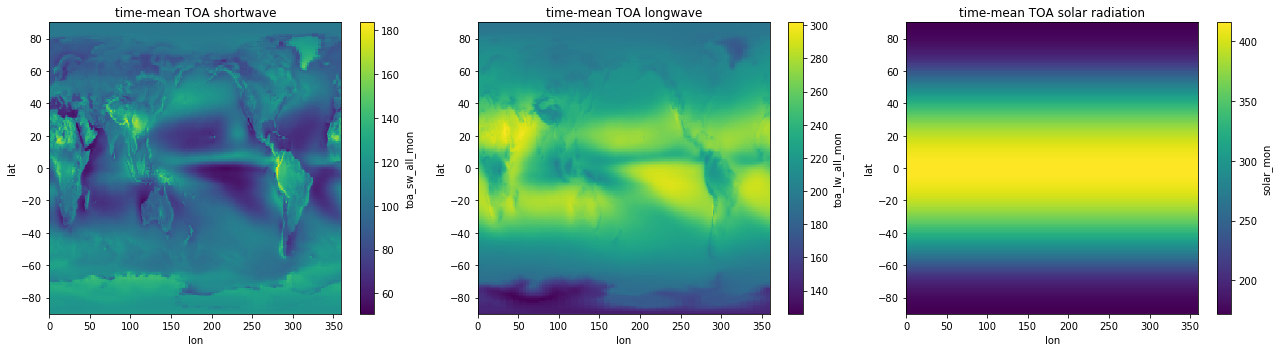

In [6]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
radiation_mean.toa_sw_all_mon.plot(ax=ax[0])
ax[0].set_title("time-mean TOA shortwave")
radiation_mean.toa_lw_all_mon.plot(ax=ax[1])
ax[1].set_title("time-mean TOA longwave")
radiation_mean.solar_mon.plot(ax=ax[2])
ax[2].set_title("time-mean TOA solar radiation")
plt.tight_layout()

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

Again, you have to pay attention to and think about the sign conventions for each variable in order to get this to work.

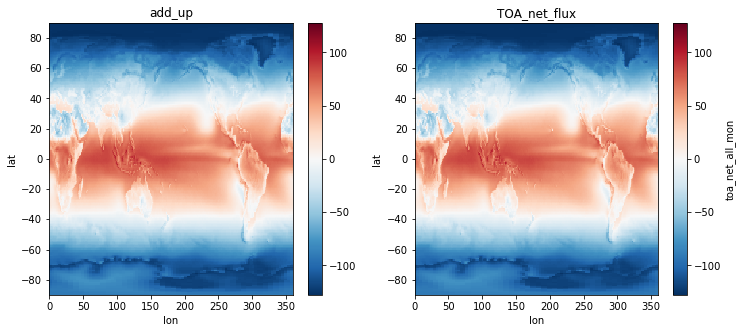

In [7]:
#add up the three variables above
add_up=radiation_mean.solar_mon-(radiation_mean.toa_sw_all_mon+radiation_mean.toa_lw_all_mon)

fig, ax = plt.subplots(1,2,figsize=(12,5))
add_up.plot(ax=ax[0])
ax[0].set_title("add_up")
radiation_mean.toa_net_all_mon.plot(ax=ax[1])
ax[1].set_title("TOA_net_flux")

## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [8]:
radiation_mean.toa_net_all_mon.mean(dim=('lon','lat'))

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729012229018643)

The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

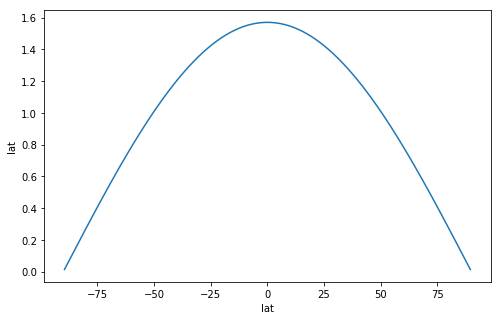

In [9]:
weight=np.cos(radiation_data.lat*np.pi/180.0)
tran=weight.mean()
weight=weight/tran
weight.plot()

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [10]:
weight_toa_net=radiation_mean.toa_net_all_mon*weight
print("weighted global mean TOA net radiation:",weight_toa_net.mean())

weighted global mean TOA net radiation: <xarray.DataArray ()>
array(0.8780921136790035)


This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above

In [11]:
weight_income_solar=radiation_mean.solar_mon*weight
weight_outgo_lw=radiation_mean.toa_lw_all_mon*weight
weight_outgo_sw=radiation_mean.toa_sw_all_mon*weight
print("TOA incoming solar:",weight_income_solar.mean())
print("TOA outgoing longwave:",weight_outgo_lw.mean())
print("TOA outgoing shortwave:",weight_outgo_sw.mean())

TOA incoming solar: <xarray.DataArray ()>
array(340.28518355884154)
TOA outgoing longwave: <xarray.DataArray ()>
array(240.2680265113834)
TOA outgoing shortwave: <xarray.DataArray ()>
array(99.13905832163078)


We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, I know the Earth is not a sphere...it's just a homework problem).

In [12]:
pixel=xr.ones_like(radiation_mean.toa_lw_all_mon)
dA=(6371000**2)*np.cos(radiation_data.lat*np.pi/180.0)*(np.pi/180.0)**2
pixel=pixel*dA
pixel_sum=pixel.sum()

earth_surface=4*np.pi*(6371000**2)
print("sum of pixel area is:",pixel_sum,"m^2")
print("true earth surface area is::",earth_surface,"m^2")
print("ratio of sum of pixel to true earth surface area",earth_surface/pixel_sum)

sum of pixel area is: <xarray.DataArray ()>
array(510070931513696.1) m^2
true earth surface area is:: 510064471909788.25 m^2
ratio of sum of pixel to true earth surface area <xarray.DataArray ()>
array(0.9999873358713293)


Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

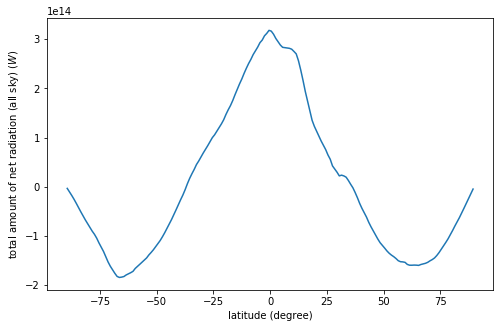

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
net_radiation_dA=radiation_mean.toa_net_all_mon*pixel
net_radiation_dA.sum(dim='lon').plot(ax=ax)
ax.set_xlabel('latitude (degree)')
ax.set_ylabel('total amount of net radiation (all sky) $(W)$')

## 4.3) Plot the cumulatuve sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

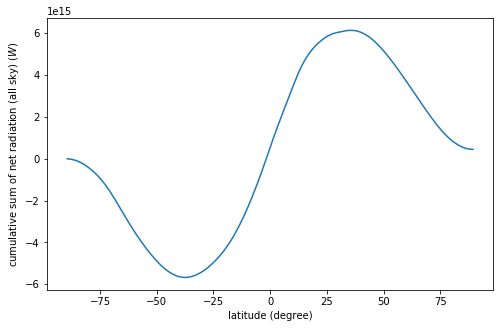

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
net_radiation_dA.sum(dim='lon').cumsum(dim='lat').plot(ax=ax)
ax.set_xlabel('latitude (degree)')
ax.set_ylabel('cumulative sum of net radiation (all sky) $(W)$')

You should get a curve tht looks something like this

![meridional energy transport](http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.gif)

## 5.1) Plot the time-mean cloud area fraction (day and night)

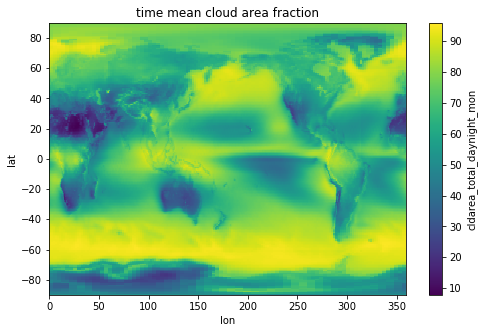

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
radiation_mean.cldarea_total_daynight_mon.plot(ax=ax)
ax.set_title("time mean cloud area fraction")

## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [16]:
#another method to get the low and high cloud area without boolean series
low_cl=radiation_data.where(radiation_data.cldarea_total_daynight_mon<=25)
high_cl=radiation_data.where(radiation_data.cldarea_total_daynight_mon>=75)

In [17]:
#boolean series
mask_lc=radiation_data.cldarea_total_daynight_mon <= 25 
mask_hc=radiation_data.cldarea_total_daynight_mon >= 75

## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful.

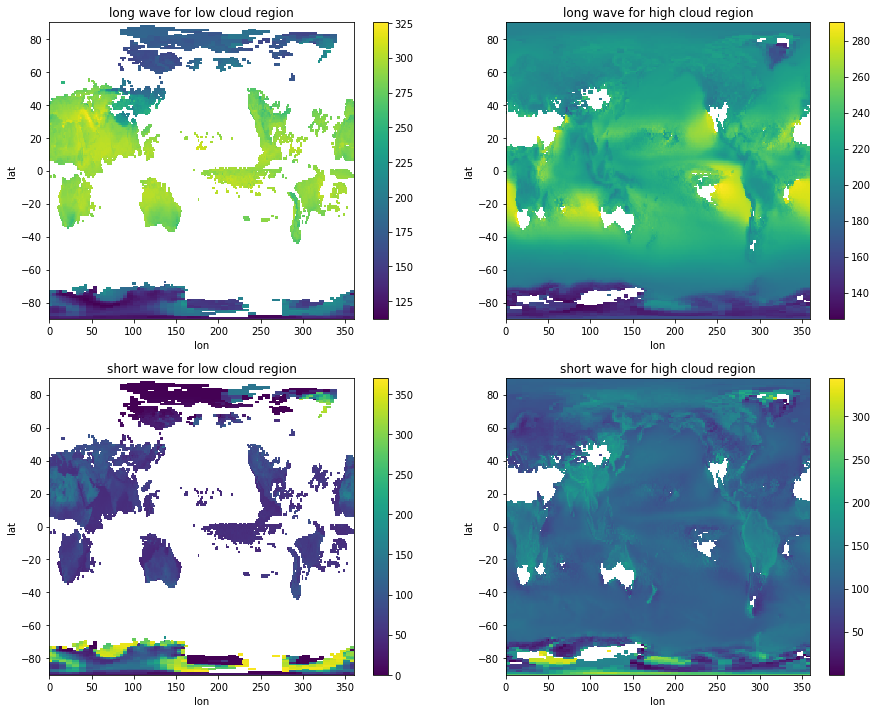

In [18]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
radiation_data.toa_lw_all_mon.where(mask_lc).mean(dim='time').plot(ax=ax[0,0])
ax[0,0].set_title("long wave for low cloud region")
radiation_data.toa_lw_all_mon.where(mask_hc).mean(dim='time').plot(ax=ax[0,1])
ax[0,1].set_title("long wave for high cloud region")
radiation_data.toa_sw_all_mon.where(mask_lc).mean(dim='time').plot(ax=ax[1,0])
ax[1,0].set_title("short wave for low cloud region")
radiation_data.toa_sw_all_mon.where(mask_hc).mean(dim='time').plot(ax=ax[1,1])
ax[1,1].set_title("short wave for high cloud region")

In [19]:
#another method without boolean series
# fig, ax = plt.subplots(2,2,figsize=(15,12))
# low_cl.toa_lw_all_mon.mean(dim='time').plot(ax=ax[0,0])
# high_cl.toa_lw_all_mon.mean(dim='time').plot(ax=ax[0,1])
# low_cl.toa_sw_all_mon.mean(dim='time').plot(ax=ax[1,0])
# high_cl.toa_sw_all_mon.mean(dim='time').plot(ax=ax[1,1])

## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

What is the overall effect of clouds on shortwave and longwave radiation?

In [20]:
lw_lowcl=low_cl.toa_lw_all_mon*weight
lw_highcl=high_cl.toa_lw_all_mon*weight
sw_lowcl=low_cl.toa_sw_all_mon*weight
sw_highcl=high_cl.toa_sw_all_mon*weight
print('mean value of longwave in low cloud region:',lw_lowcl.mean())
print('mean value of longwave in high cloud region:',lw_highcl.mean())
print('mean value of shortwave in low cloud region:',sw_lowcl.mean())
print('mean value of shortwave in high cloud region:',sw_highcl.mean())

mean value of longwave in low cloud region: <xarray.DataArray ()>
array(304.63691050293454)
mean value of longwave in high cloud region: <xarray.DataArray ()>
array(211.05384060902182)
mean value of shortwave in low cloud region: <xarray.DataArray ()>
array(99.07290902196438)
mean value of shortwave in high cloud region: <xarray.DataArray ()>
array(107.1825212811719)


## 6.1) Create a new dataset with the monthly seasonal cycle removed


In [21]:
radiation_clim = radiation_data.groupby('time.month').mean(dim='time')
radiation_anom = radiation_data.groupby('time.month') - radiation_clim
radiation_anom

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
    month                        (time) int64 3 4 5 6 7 8 9 10 11 12 1 2 3 4 ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float64 -1.255 -1.255 ...
    toa_lw_all_mon               (time, lat, lon) float64 -2.218 -2.218 ...
    toa_net_all_mon              (time, lat, lon) float64 1.641 1.641 1.641 ...
    toa_sw_clr_mon               (time, lat, lon) float64 5.846 5.846 5.846 ...
    toa_lw_clr_mon               (time, lat, lon) float64 -2.841 -2.841 ...
    toa_net_clr_mon              (time, lat, lon) float64 -4.7 -4.7 -4.7 ...
    toa_cre_sw_mon               (time, lat, lon) float64 7.1 7.1 7.1 7.1 ...
    toa_cre_lw_mon      

## 6.2) Load the NINO3.4 index data we calculated and output during class and add it as a coordinate variable to the anomaly dataset

In [22]:
nino34=xr.open_dataset('/Users/admin/desktop/research_computing/7/nino34_index.nc')
radiation_anom['nino34']=nino34.nino34
radiation_anom.set_coords(['nino34'])

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
    month                        (time) int64 3 4 5 6 7 8 9 10 11 12 1 2 3 4 ...
    nino34                       (time) object 'nina' 'nina' 'nina' 'nina' ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float64 -1.255 -1.255 ...
    toa_lw_all_mon               (time, lat, lon) float64 -2.218 -2.218 ...
    toa_net_all_mon              (time, lat, lon) float64 1.641 1.641 1.641 ...
    toa_sw_clr_mon               (time, lat, lon) float64 5.846 5.846 5.846 ...
    toa_lw_clr_mon               (time, lat, lon) float64 -2.841 -2.841 ...
    toa_net_clr_mon              (time, lat, lon) float64 -4.7 -4.7 -4.7 ...
    toa_cre_sw_mon     

## 6.3) Calculate and plot the mean difference in net radiation between El Nino and La Nina periods

In [23]:
radiation_anom = radiation_anom.swap_dims({'time': 'nino34'})

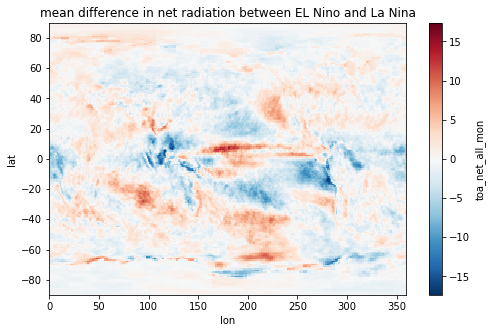

In [24]:
mean_diff=radiation_anom.toa_net_all_mon.sel(nino34='nino').mean(dim='nino34')-radiation_anom.toa_net_all_mon.sel(nino34='nina').mean(dim='nino34')
fig, ax = plt.subplots(figsize=(8,5))
mean_diff.plot(ax=ax)
ax.set_title("mean difference in net radiation between EL Nino and La Nina")